In [1]:
!pip install uproot3
!pip install uproot_methods
!pip install mplhep

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import uproot3 as ROOT
import uproot_methods as ROOT_methods
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
import mplhep as hep


In [4]:
!ls drive/MyDrive/Event_Sample/BKG_Drellyan.root

drive/MyDrive/Event_Sample/BKG_Drellyan.root


In [5]:
# TTree를 읽어옵니다. 젠레벨 샘플을 활용할 경우 끝에 ["Delphes"] 가 아닌 ["LHEF"] 를 넣어주세요

tree = ROOT.open("/content/drive/MyDrive/Event_Sample/BKG_Drellyan.root")["Delphes"]

In [6]:
# 젠 레벨에서 pt, eta, phi를 따옵니다.
# 어레이로 받아주는 방법은 전 시간과 마찬가지 입니다.

pt = tree["Particle.PT"].array()
eta = tree["Particle.Eta"].array()
phi = tree["Particle.Phi"].array()
pid = tree["Particle.PID"].array()
status = tree["Particle.Status"].array()


In [7]:
# 최종상태의 전자와, 양전자를 골라주는 마스크를 만들어줍니다.
# 이해가 잘 안된다면 전 시간 자료를 참고하세요.

nege = (pid == 11) & (status == 1)
pose = (pid == -11) & (status == 1)

In [8]:
# 전자 마스크

pt_nege = pt[nege]
eta_nege = eta[nege]
phi_nege = phi[nege]

In [9]:
# 양전자 마스크

pt_pose = pt[pose]
eta_pose = eta[pose]
phi_pose = phi[pose]

In [10]:
# 새 배열을 선언한 후 두 전자의 정지질량을 계산합니다.
# 공식은 위키피디아에서 쉽게 찾을 수 있습니다.

dilepton_mass = []
for i in range(len(pt)):
  if pt_nege.counts[i] == 1:
    if pt_pose.counts[i] == 1:
      dilepton_mass.append(np.sqrt(2*pt_pose[i]*pt_nege[i]*(np.cosh(eta_pose[i] - eta_nege[i]) - np.cos(phi_pose[i] - phi_nege[i]))))

In [11]:
# 배열을 numpy 모듈로 평평하게 해줍니다.

dilepton_mass = np.array(dilepton_mass).flatten()

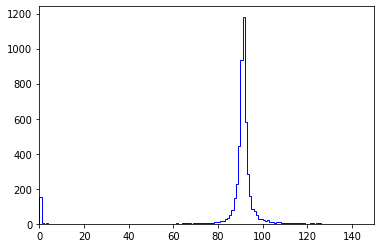

In [12]:
## 뽑아온 친구들로 두 전자의 정지질량의 히스토그람을 작성합시다.

plt.hist(dilepton_mass,bins=150,range=(0,150),color='blue',histtype='step')
plt.xlim(0,150)
plt.show()

In [13]:
## HOMEWORK
# Q1. for 문을 사용한 이유에 대해서 생각해보세요.
# hint : 전자와 양전자의 pt array(아무거나 상관없음) 를 직접 출력해보세요.




In [15]:
# Q2. 히스토그램의 분포가 무엇을 의미하는지 설명하세요.
# hint : 우리가 구한것은 dilepton의 질량입니다. 이것을 왜 구하는 걸까요?



In [16]:
# Q3. 전자- 전자 채널이 아닌 뮤온- 뮤온 채널에서 dilepton의 mass를 구해보세요.
# hint : PID



In [17]:
## APPENDIX ##

## STANDARD MODEL PID NUMBERING SCHEME
#
#  QUARKS         ANTIQUARKS
#  d = 1	  d~ = -1
#  u = 2	  u~ = -2
#  s = 3	  s~ = -3
#  c = 4	  c~ = -4
#  b = 5	  b~ = -5
#  t = 6	  t~ = -6
#
#  LEPTONS        ANTILEPTONS
#  e-  = 11	  e+  = -11
#  ve  = 12	  ve~ = -12
#  mu- = 13	  mu+ = -13
#  vu  = 14	  vu~ = -14
#  ta- = 15	  ta+ = -15
#  vt  = 16	  vt~ = -16
#
#  BOSONS
#  g  =  21
#  a  =  22
#  z  =  23
#  w+ =  24
#  w- = -24
#
## END OF TABLE 